In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix

In [3]:
#loading the data from my own github repo
# Loading Data from Github

# Loading Data from Github

url0 = "https://github.com/vidhika-git/DAV-6150/blob/main/EDA/M5_Data.csv?raw=true"


# Reading Data via pd.read_csv
df = pd.read_csv(url0)
pd.set_option('display.max_columns', None)
# Displaying first 10 rows of the data
df.head(5)

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [5]:
df['class'].value_counts()

0    124
1     57
Name: class, dtype: int64

In [6]:
df['scored.class'].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

In [4]:
# Calculating the confusion matrix using crosstab
conf_matrix = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'], colnames=['Predicted'])

# Display the confusion matrix
print(conf_matrix)


Predicted    0   1
Actual            
0          119   5
1           30  27


Extract the individual confusion matrix values (True Positive, False Positive, True Negative, False Negative) from the output of the crosstab() function.

In [7]:
# Extracting individual confusion matrix values
TP = conf_matrix.loc[1, 1]
FP = conf_matrix.loc[0, 1]
TN = conf_matrix.loc[0, 0]
FN = conf_matrix.loc[1, 0]

# Display the extracted values
print("True Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)


True Positives: 27
False Positives: 5
True Negatives: 119
False Negatives: 30


Write Python functions to calculate accuracy, precision, sensitivity, specificity, and F1 Score metrics.

In [9]:
def accuracy(TP, FP, TN, FN):
    return (TP + TN) / (TP + FP + TN + FN)

def precision(TP, FP):
    return TP / (TP + FP)

def sensitivity(TP, FN):
    return TP / (TP + FN)

def specificity(TN, FP):
    return TN / (TN + FP)

def f1_score(TP, FP, FN):
    prec = precision(TP, FP)
    recall = sensitivity(TP, FN)
    return 2 * (prec * recall) / (prec + recall)


Apply the Python functions you've created to the relevant columns of the provided data set.

In [10]:
acc = accuracy(TP, FP, TN, FN)
prec = precision(TP, FP)
sens = sensitivity(TP, FN)
spec = specificity(TN, FP)
f1 = f1_score(TP, FP, FN)

# Display the calculated metrics
print("Accuracy:", acc)
print("Precision:", prec)
print("Sensitivity:", sens)
print("Specificity:", spec)
print("F1 Score:", f1)


Accuracy: 0.8066298342541437
Precision: 0.84375
Sensitivity: 0.47368421052631576
Specificity: 0.9596774193548387
F1 Score: 0.6067415730337079


 Compare the output of your functions against the output of the pre-built functions available within the scikit-learn library.

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics using scikit-learn functions
sklearn_conf_matrix = confusion_matrix(df['class'], df['scored.class'])
sklearn_acc = accuracy_score(df['class'], df['scored.class'])
sklearn_prec = precision_score(df['class'], df['scored.class'])
sklearn_recall = recall_score(df['class'], df['scored.class'])
sklearn_f1 = f1_score(df['class'], df['scored.class'])
sklearn_classification_report = classification_report(df['class'], df['scored.class'])

# Display the metrics calculated using scikit-learn functions
print("Confusion Matrix (Scikit-Learn):\n", sklearn_conf_matrix)
print("Accuracy (Scikit-Learn):", sklearn_acc)
print("Precision (Scikit-Learn):", sklearn_prec)
print("Recall (Scikit-Learn):", sklearn_recall)
print("F1 Score (Scikit-Learn):", sklearn_f1)
print("Classification Report (Scikit-Learn):\n", sklearn_classification_report)


Confusion Matrix (Scikit-Learn):
 [[119   5]
 [ 30  27]]
Accuracy (Scikit-Learn): 0.8066298342541437
Precision (Scikit-Learn): 0.84375
Recall (Scikit-Learn): 0.47368421052631576
F1 Score (Scikit-Learn): 0.6067415730337079
Classification Report (Scikit-Learn):
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



Use the metrics.plot_roc_curve() and metrics.auc() functions from the scikit-learn package to generate a ROC plot and calculate AUC for the provided data set.

0.8503112620260327


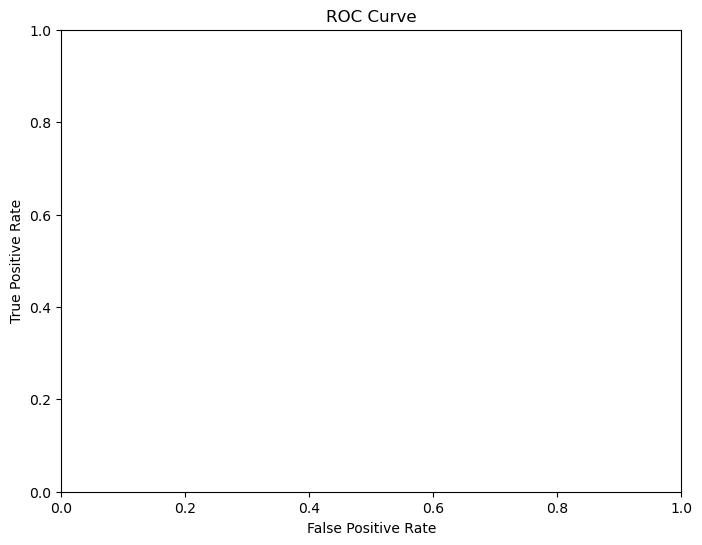

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Plot ROC curve and calculate AUC
plt.figure(figsize=(8, 6))
#roc_curve(y_true=, y_score=df['scored.probability'])
print(roc_auc_score(df['class'], df['scored.probability']))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Calculate AUC
#roc_auc = auc(df['class'], df['scored.probability'])
#print("AUC:", roc_auc)


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_roc_curve_manual(y_true, y_score):
    # Sort the scores and true labels based on the descending order of scores
    sorted_indices = np.argsort(y_score)[::-1]
    sorted_scores = y_score[sorted_indices]
    sorted_labels = y_true[sorted_indices]
    
    # Initialize lists to store true positive rate (TPR) and false positive rate (FPR)
    tpr_list = []
    fpr_list = []
    
    # Initialize variables to keep track of counts
    num_positive = np.sum(sorted_labels == 1)
    num_negative = np.sum(sorted_labels == 0)
    tp_count = 0
    fp_count = 0
    
    # Iterate through each score
    for score, label in zip(sorted_scores, sorted_labels):
        if label == 1:
            tp_count += 1
        else:
            fp_count += 1
        
        # Calculate TPR and FPR
        tpr = tp_count / num_positive
        fpr = fp_count / num_negative
        
        # Append TPR and FPR to lists
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # Calculate AUC using trapezoidal rule
    auc = np.trapz(tpr_list, fpr_list)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_list, tpr_list, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Return AUC
    return auc



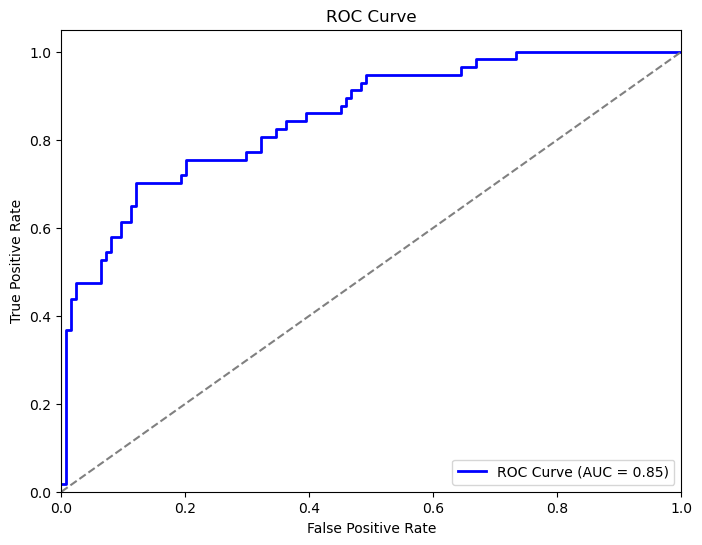

AUC (Manual): 0.8503112620260328


In [24]:
# Assuming y_true contains the true labels and y_score contains the predicted scores
auc_manual = plot_roc_curve_manual(y_true=df['class'], y_score=df['scored.probability'])
print("AUC (Manual):", auc_manual)
